In [2]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = 'ticks')
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
flatui = sns.color_palette(flatui)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/sharmaroshan/FIFA-2019-Analysis/master/Footballer.csv')

In [4]:
df.head(10)

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   
5           5  183277          E. Hazard   27   
6           6  177003          L. Modrić   32   
7           7  176580          L. Suárez   31   
8           8  155862       Sergio Ramos   32   
9           9  200389           J. Oblak   25   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
5  https://cdn.sofifa.org/players/4/19/183277.png     Belgium   
6  https://cdn.sofifa.org/players/4/19/177003.png     Croatia   
7  https://cdn.sofifa.org/players/4/19/176580.png     Uruguay   
8  https://cdn.sofifa.org/players/4/19/155862.png       Spain   
9  https://cdn.sofifa.org/players/4/19/200389.png    Slovenia   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   
5   https://cdn.sofifa.org/flags/7.png       91         91   
6  https://cdn.sofifa.org/flags/10.png       91         91   
7  https://cdn.sofifa.org/flags/60.png       91         91   
8  https://cdn.sofifa.org/flags/45.png       91         91   
9  https://cdn.sofifa.org/flags/44.png       90         93   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   
5              Chelsea  ...      91.0    34.0           27.0           22.0   
6          Real Madrid  ...      84.0    60.0           76.0           73.0   
7         FC Barcelona  ...      85.0    62.0           45.0           38.0   
8          Real Madrid  ...      82.0    87.0           92.0           91.0   
9      Atlético Madrid  ...      70.0    27.0           12.0           18.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  
5     11.0        12.0        6.0            8.0        8.0        €172.1M  
6     13.0         9.0        7.0           14.0        9.0        €137.4M  
7     27.0        25.0       31.0           33.0       37.0          €164M  
8     11.0         8.0        9.0            7.0       11.0        €104.6M  
9     86.0        92.0       78.0           88.0       89.0        €144.5M  

[10 rows x 89 columns]

In [5]:
df.shape

(18207, 89)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [7]:
df.tail()

Unnamed: 0      ID                Name  Age  \
18202       18202  238813        J. Lundstram   19   
18203       18203  243165  N. Christoffersson   19   
18204       18204  241638           B. Worman   16   
18205       18205  246268      D. Walker-Rice   17   
18206       18206  246269           G. Nugent   16   

                                                Photo Nationality  \
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                   Club  ... Composure Marking StandingTackle  SlidingTackle  \
18202   Crewe Alexandra  ...      45.0    40.0           48.0           47.0   
18203    Trelleborgs FF  ...      42.0    22.0           15.0           19.0   
18204  Cambridge United  ...      41.0    32.0           13.0           11.0   
18205   Tranmere Rovers  ...      46.0    20.0           25.0           27.0   
18206   Tranmere Rovers  ...      43.0    40.0           43.0           50.0   

      GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
18202     10.0        13.0        7.0            8.0        9.0          €143K  
18203     10.0         9.0        9.0            5.0       12.0          €113K  
18204      6.0         5.0       10.0            6.0       13.0          €165K  
18205     14.0         6.0       14.0            8.0        9.0          €143K  
18206     10.0        15.0        9.0           12.0        9.0          €165K  

[5 rows x 89 columns]

In [8]:
df.dtypes

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

In [9]:
df.describe()

Unnamed: 0             ID           Age       Overall     Potential  \
count  18207.000000   18207.000000  18207.000000  18207.000000  18207.000000   
mean    9103.000000  214298.338606     25.122206     66.238699     71.307299   
std     5256.052511   29965.244204      4.669943      6.908930      6.136496   
min        0.000000      16.000000     16.000000     46.000000     48.000000   
25%     4551.500000  200315.500000     21.000000     62.000000     67.000000   
50%     9103.000000  221759.000000     25.000000     66.000000     71.000000   
75%    13654.500000  236529.500000     28.000000     71.000000     75.000000   
max    18206.000000  246620.000000     45.000000     94.000000     95.000000   

            Special  International Reputation     Weak Foot   Skill Moves  \
count  18207.000000              18159.000000  18159.000000  18159.000000   
mean    1597.809908                  1.113222      2.947299      2.361308   
std      272.586016                  0.394031      0.660456      0.756164   
min      731.000000                  1.000000      1.000000      1.000000   
25%     1457.000000                  1.000000      3.000000      2.000000   
50%     1635.000000                  1.000000      3.000000      2.000000   
75%     1787.000000                  1.000000      3.000000      3.000000   
max     2346.000000                  5.000000      5.000000      5.000000   

       Jersey Number  ...     Penalties     Composure       Marking  \
count   18147.000000  ...  18159.000000  18159.000000  18159.000000   
mean       19.546096  ...     48.548598     58.648274     47.281623   
std        15.947765  ...     15.704053     11.436133     19.904397   
min         1.000000  ...      5.000000      3.000000      3.000000   
25%         8.000000  ...     39.000000     51.000000     30.000000   
50%        17.000000  ...     49.000000     60.000000     53.000000   
75%        26.000000  ...     60.000000     67.000000     64.000000   
max        99.000000  ...     92.000000     96.000000     94.000000   

       StandingTackle  SlidingTackle      GKDiving    GKHandling  \
count    18159.000000   18159.000000  18159.000000  18159.000000   
mean        47.697836      45.661435     16.616223     16.391596   
std         21.664004      21.289135     17.695349     16.906900   
min          2.000000       3.000000      1.000000      1.000000   
25%         27.000000      24.000000      8.000000      8.000000   
50%         55.000000      52.000000     11.000000     11.000000   
75%         66.000000      64.000000     14.000000     14.000000   
max         93.000000      91.000000     90.000000     92.000000   

          GKKicking  GKPositioning    GKReflexes  
count  18159.000000   18159.000000  18159.000000  
mean      16.232061      16.388898     16.710887  
std       16.502864      17.034669     17.955119  
min        1.000000       1.000000      1.000000  
25%        8.000000       8.000000      8.000000  
50%       11.000000      11.000000     11.000000  
75%       14.000000      14.000000     14.000000  
max       91.000000      90.000000     94.000000  

[8 rows x 44 columns]

In [10]:
df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [11]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

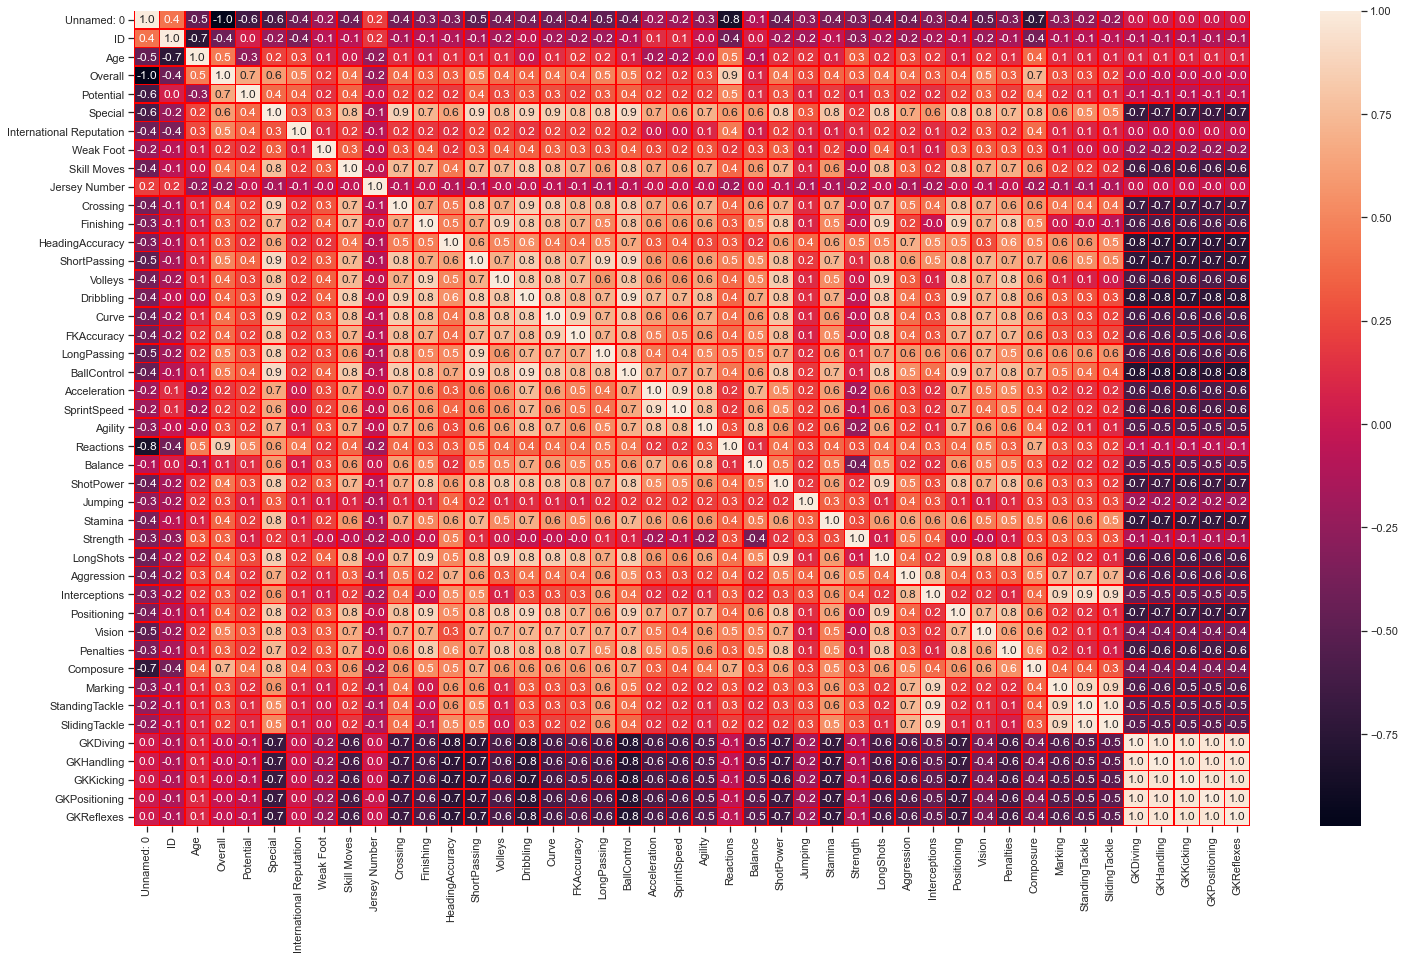

In [12]:
fig, axes = plt.subplots(figsize = (25,15))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor='red', ax=axes, fmt='0.1f')
plt.show()

In [13]:
from wordcloud import WordCloud

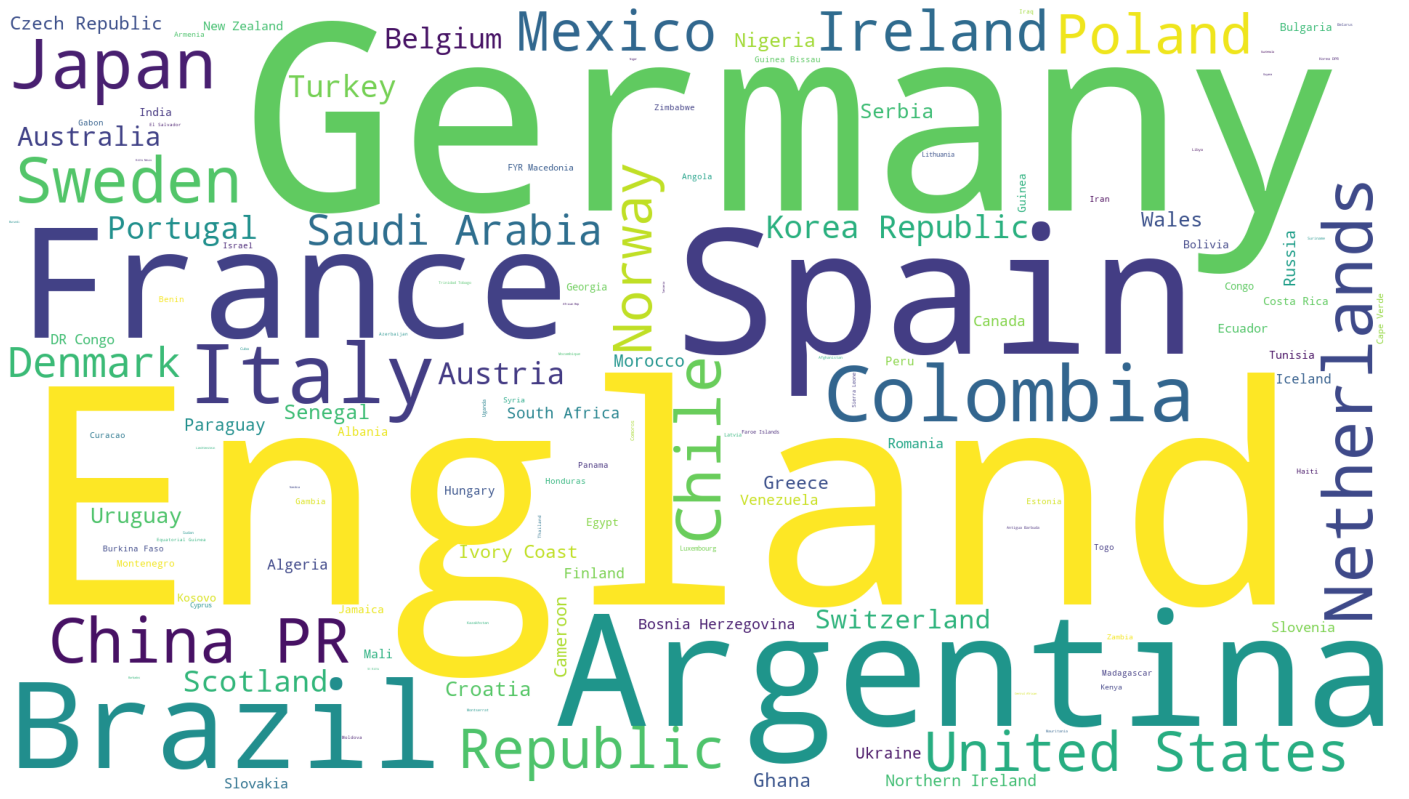

In [14]:
plt.subplots(figsize = (25,15))
word_cloud = WordCloud(background_color='white', width=1920,height=1080).generate(" ".join(df.Nationality))
plt.imshow(word_cloud)
plt.axis('off')
plt.savefig( 'graph.png')
plt.show()


In [16]:
df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [19]:
df['Club'].isnull().sum()

241

In [21]:
df['Club'].fillna("No Club", inplace=True)
df.Position.fillna("ST", inplace=True)

In [22]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [26]:
to_impute_by_mean = df.loc[:,['Crossing', 'Finishing', 'HeadingAccuracy',
                                 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
                                 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
                                 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
                                 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
                                 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
                                 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                                 'GKKicking', 'GKPositioning', 'GKReflexes'] ]

In [30]:
for i in to_impute_by_mean:
    df[i].fillna(df[i].mean(), inplace=True)

In [31]:
df['Crossing'].isnull().sum()

0

In [36]:
to_impute_by_mode = df.loc[:, ['Body Type','International Reputation', 'Height', 'Weight', 'Preferred Foot','Jersey Number']]

In [37]:
for i in to_impute_by_mode:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [38]:
df

Unnamed: 0      ID                Name  Age  \
0               0  158023            L. Messi   31   
1               1   20801   Cristiano Ronaldo   33   
2               2  190871           Neymar Jr   26   
3               3  193080              De Gea   27   
4               4  192985        K. De Bruyne   27   
...           ...     ...                 ...  ...   
18202       18202  238813        J. Lundstram   19   
18203       18203  243165  N. Christoffersson   19   
18204       18204  241638           B. Worman   16   
18205       18205  246268      D. Walker-Rice   17   
18206       18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
...                                    ...      ...        ...   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club  ... Composure Marking StandingTackle  \
0             FC Barcelona  ...      96.0    33.0           28.0   
1                 Juventus  ...      95.0    28.0           31.0   
2      Paris Saint-Germain  ...      94.0    27.0           24.0   
3        Manchester United  ...      68.0    15.0           21.0   
4          Manchester City  ...      88.0    68.0           58.0   
...                    ...  ...       ...     ...            ...   
18202      Crewe Alexandra  ...      45.0    40.0           48.0   
18203       Trelleborgs FF  ...      42.0    22.0           15.0   
18204     Cambridge United  ...      41.0    32.0           13.0   
18205      Tranmere Rovers  ...      46.0    20.0           25.0   
18206      Tranmere Rovers  ...      43.0    40.0           43.0   

       SlidingTackle GKDiving  GKHandling  GKKicking  GKPositioning  \
0               26.0      6.0        11.0       15.0           14.0   
1               23.0      7.0        11.0       15.0           14.0   
2               33.0      9.0         9.0       15.0           15.0   
3               13.0     90.0        85.0       87.0           88.0   
4               51.0     15.0        13.0        5.0           10.0   
...              ...      ...         ...        ...            ...   
18202           47.0     10.0        13.0        7.0            8.0   
18203           19.0     10.0         9.0        9.0            5.0   
18204           11.0      6.0         5.0       10.0            6.0   
18205           27.0     14.0         6.0       14.0            8.0   
18206           50.0     10.0        15.0        9.0           12.0   

      GKReflexes Release Clause  
0            8.0        €226.5M 

In [43]:
to_impute_by_median = df.loc[:,['Weak Foot', 'Skill Moves']]

In [44]:
for i in to_impute_by_median:
    df[i].fillna(df[i].median(), inplace=True)

In [45]:
to_impute_by_median

Weak Foot  Skill Moves
0            4.0          4.0
1            4.0          5.0
2            5.0          5.0
3            3.0          1.0
4            5.0          4.0
...          ...          ...
18202        2.0          2.0
18203        2.0          2.0
18204        3.0          2.0
18205        3.0          2.0
18206        3.0          2.0

[18207 rows x 2 columns]

In [46]:
to_impute_by_mean

Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0          84.0       95.0             70.0          90.0     86.0       97.0   
1          84.0       94.0             89.0          81.0     87.0       88.0   
2          79.0       87.0             62.0          84.0     84.0       96.0   
3          17.0       13.0             21.0          50.0     13.0       18.0   
4          93.0       82.0             55.0          92.0     82.0       86.0   
...         ...        ...              ...           ...      ...        ...   
18202      34.0       38.0             40.0          49.0     25.0       42.0   
18203      23.0       52.0             52.0          43.0     36.0       39.0   
18204      25.0       40.0             46.0          38.0     38.0       45.0   
18205      44.0       50.0             39.0          42.0     40.0       51.0   
18206      41.0       34.0             46.0          48.0     30.0       43.0   

       Curve  FKAccuracy  LongPassing  BallControl  ...  Penalties  Composure  \
0       93.0        94.0         87.0         96.0  ...       75.0       96.0   
1       81.0        76.0         77.0         94.0  ...       85.0       95.0   
2       88.0        87.0         78.0         95.0  ...       81.0       94.0   
3       21.0        19.0         51.0         42.0  ...       40.0       68.0   
4       85.0        83.0         91.0         91.0  ...       79.0       88.0   
...      ...         ...          ...          ...  ...        ...        ...   
18202   30.0        34.0         45.0         43.0  ...       43.0       45.0   
18203   32.0        20.0         25.0         40.0  ...       43.0       42.0   
18204   38.0        27.0         28.0         44.0  ...       55.0       41.0   
18205   34.0        32.0         32.0         52.0  ...       50.0       46.0   
18206   40.0        34.0         44.0         51.0  ...       33.0       43.0   

       Marking  StandingTackle  SlidingTackle  GKDiving  GKHandling  \
0         33.0            28.0           26.0       6.0        11.0   
1         28.0            31.0           23.0       7.0        11.0   
2         27.0            24.0           33.0       9.0         9.0   
3         15.0            21.0           13.0      90.0        85.0   
4         68.0            58.0           51.0      15.0        13.0   
...        ...             ...            ...       ...         ...   
18202     40.0            48.0           47.0      10.0        13.0   
18203     22.0            15.0           19.0      10.0         9.0   
18204     32.0            13.0           11.0       6.0         5.0   
18205     20.0            25.0           27.0      14.0         6.0   
18206     40.0            43.0           50.0      10.0        15.0   

       GKKicking  GKPositioning  GKReflexes  
0           15.0           14.0         8.0  
1           15.0           14.0        11.0  
2           15.0           15.0        11.0  
3           87.0           88.0        94.0  
4            5.0           10.0        13.0  
...          ...            ...         ...  
18202        7.0            8.0         9.0  
18203        9.0            5.0        12.0  
18204       10.0            6.0        13.0  
18205       14.0            8.0         9.0  
18206        9.0           12.0         9.0  

[18207 rows x 34 columns]

In [47]:
to_impute_by_mode

Body Type  International Reputation Height  Weight Preferred Foot  \
0           Messi                       5.0    5'7  159lbs           Left   
1      C. Ronaldo                       5.0    6'2  183lbs          Right   
2          Neymar                       5.0    5'9  150lbs          Right   
3            Lean                       4.0    6'4  168lbs          Right   
4          Normal                       4.0   5'11  154lbs          Right   
...           ...                       ...    ...     ...            ...   
18202        Lean                       1.0    5'9  134lbs          Right   
18203      Normal                       1.0    6'3  170lbs          Right   
18204      Normal                       1.0    5'8  148lbs          Right   
18205        Lean                       1.0   5'10  154lbs          Right   
18206        Lean                       1.0   5'10  176lbs          Right   

       Jersey Number  
0               10.0  
1                7.0  
2               10.0  
3                1.0  
4                7.0  
...              ...  
18202           22.0  
18203           21.0  
18204           33.0  
18205           34.0  
18206           33.0  

[18207 rows x 6 columns]

In [48]:
df.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

In [51]:
print(df.isnull().any())

Unnamed: 0        False
ID                False
Name              False
Age               False
Photo             False
                  ...  
GKHandling        False
GKKicking         False
GKPositioning     False
GKReflexes        False
Release Clause     True
Length: 89, dtype: bool


In [56]:
df.columns[df.isna().any()]

Index(['Work Rate', 'Real Face', 'Joined', 'Loaned From',
       'Contract Valid Until', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause'],
      dtype='object')

In [59]:
df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling           0
GKKicking            0
GKPositioning        0
GKReflexes           0
Release Clause    1564
Length: 89, dtype: int64

In [60]:
df.fillna(0,inplace=True)

In [61]:
df.head(12)

Unnamed: 0      ID               Name  Age  \
0            0  158023           L. Messi   31   
1            1   20801  Cristiano Ronaldo   33   
2            2  190871          Neymar Jr   26   
3            3  193080             De Gea   27   
4            4  192985       K. De Bruyne   27   
5            5  183277          E. Hazard   27   
6            6  177003          L. Modrić   32   
7            7  176580          L. Suárez   31   
8            8  155862       Sergio Ramos   32   
9            9  200389           J. Oblak   25   
10          10  188545     R. Lewandowski   29   
11          11  182521           T. Kroos   28   

                                             Photo Nationality  \
0   https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1    https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2   https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3   https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4   https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
5   https://cdn.sofifa.org/players/4/19/183277.png     Belgium   
6   https://cdn.sofifa.org/players/4/19/177003.png     Croatia   
7   https://cdn.sofifa.org/players/4/19/176580.png     Uruguay   
8   https://cdn.sofifa.org/players/4/19/155862.png       Spain   
9   https://cdn.sofifa.org/players/4/19/200389.png    Slovenia   
10  https://cdn.sofifa.org/players/4/19/188545.png      Poland   
11  https://cdn.sofifa.org/players/4/19/182521.png     Germany   

                                   Flag  Overall  Potential  \
0   https://cdn.sofifa.org/flags/52.png       94         94   
1   https://cdn.sofifa.org/flags/38.png       94         94   
2   https://cdn.sofifa.org/flags/54.png       92         93   
3   https://cdn.sofifa.org/flags/45.png       91         93   
4    https://cdn.sofifa.org/flags/7.png       91         92   
5    https://cdn.sofifa.org/flags/7.png       91         91   
6   https://cdn.sofifa.org/flags/10.png       91         91   
7   https://cdn.sofifa.org/flags/60.png       91         91   
8   https://cdn.sofifa.org/flags/45.png       91         91   
9   https://cdn.sofifa.org/flags/44.png       90         93   
10  https://cdn.sofifa.org/flags/37.png       90         90   
11  https://cdn.sofifa.org/flags/21.png       90         90   

                   Club  ... Composure Marking StandingTackle  SlidingTackle  \
0          FC Barcelona  ...      96.0    33.0           28.0           26.0   
1              Juventus  ...      95.0    28.0           31.0           23.0   
2   Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3     Manchester United  ...      68.0    15.0           21.0           13.0   
4       Manchester City  ...      88.0    68.0           58.0           51.0   
5               Chelsea  ...      91.0    34.0           27.0           22.0   
6           Real Madrid  ...      84.0    60.0           76.0           73.0   
7          FC Barcelona  ...      85.0    62.0           45.0           38.0   
8           Real Madrid  ...      82.0    87.0           92.0           91.0   
9       Atlético Madrid  ...      70.0    27.0           12.0           18.0   
10    FC Bayern München  ...      86.0    34.0           42.0           19.0   
11          Real Madrid  ...      85.0    72.0           79.0           69.0   

   GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0       6.0        11.0       15.0           14.0        8.0        €226.5M  
1       7.0        11.0       15.0           14.0       11.0        €127.1M  
2       9.0         9.0       15.0           15.0       11.0        €228.1M  
3      90.0        85.0       87.0           88.0       94.0        €138.6M  
4      15.0        13.0        5.0           10.0       13.0        €196.4M  
5      11.0        12.0        6.0            8.0        8.0        €172.1M  
6      13.0         9.0        7.0           14.0        9.0        €137.4M  
7      27

In [74]:
int(round((df[['Marking', 'StandingTackle','SlidingTackle']].mean()).mean()))

47

In [75]:
def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))


In [76]:
df.rename(columns={'Club Logo':'Club_Logo'}, inplace= True)

In [77]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club_Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [78]:
df['Defending'] = df.apply(defending,axis=1)

In [79]:
df['General'] = df.apply(general, axis = 1)
df['Mental'] = df.apply(mental, axis = 1)
df['Passing'] = df.apply(passing, axis = 1)
df['Mobility'] = df.apply(mobility, axis = 1)
df['Power'] = df.apply(power, axis = 1)
df['Rating'] = df.apply(rating, axis = 1)
df['Shooting'] = df.apply(shooting, axis = 1)

In [80]:
df.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... GKReflexes Release Clause Defending  General  \
0         FC Barcelona  ...        8.0        €226.5M        29       89   
1             Juventus  ...       11.0        €127.1M        27       88   
2  Paris Saint-Germain  ...       11.0        €228.1M        28       85   
3    Manchester United  ...       94.0        €138.6M        16       26   
4      Manchester City  ...       13.0        €196.4M        59       79   

  Mental  Passing  Mobility  Power Rating Shooting  
0     71       87        91     74     94       88  
1     73       81        91     83     94       88  
2     72       80        94     69     92       84  
3     43       39        66     54     92       21  
4     81       92        81     76     92       85  

[5 rows x 97 columns]

In [83]:
players = df[['Name','Defending','General','Mental','Passing',
                'Mobility','Power','Rating','Shooting','Flag','Age',
                'Nationality', 'Photo', 'Club_Logo', 'Club']]

In [84]:
players.head()

Name  Defending  General  Mental  Passing  Mobility  Power  \
0           L. Messi         29       89      71       87        91     74   
1  Cristiano Ronaldo         27       88      73       81        91     83   
2          Neymar Jr         28       85      72       80        94     69   
3             De Gea         16       26      43       39        66     54   
4       K. De Bruyne         59       79      81       92        81     76   

   Rating  Shooting                                 Flag  Age Nationality  \
0      94        88  https://cdn.sofifa.org/flags/52.png   31   Argentina   
1      94        88  https://cdn.sofifa.org/flags/38.png   33    Portugal   
2      92        84  https://cdn.sofifa.org/flags/54.png   26      Brazil   
3      92        21  https://cdn.sofifa.org/flags/45.png   27       Spain   
4      92        85   https://cdn.sofifa.org/flags/7.png   27     Belgium   

                                            Photo  \
0  https://cdn.sofifa.org/players/4/19/158023.png   
1   https://cdn.sofifa.org/players/4/19/20801.png   
2  https://cdn.sofifa.org/players/4/19/190871.png   
3  https://cdn.sofifa.org/players/4/19/193080.png   
4  https://cdn.sofifa.org/players/4/19/192985.png   

                                      Club_Logo                 Club  
0  https://cdn.sofifa.org/teams/2/light/241.png         FC Barcelona  
1   https://cdn.sofifa.org/teams/2/light/45.png             Juventus  
2   https://cdn.sofifa.org/teams/2/light/73.png  Paris Saint-Germain  
3   https://cdn.sofifa.org/teams/2/light/11.png    Manchester United  
4   https://cdn.sofifa.org/teams/2/light/10.png      Manchester City

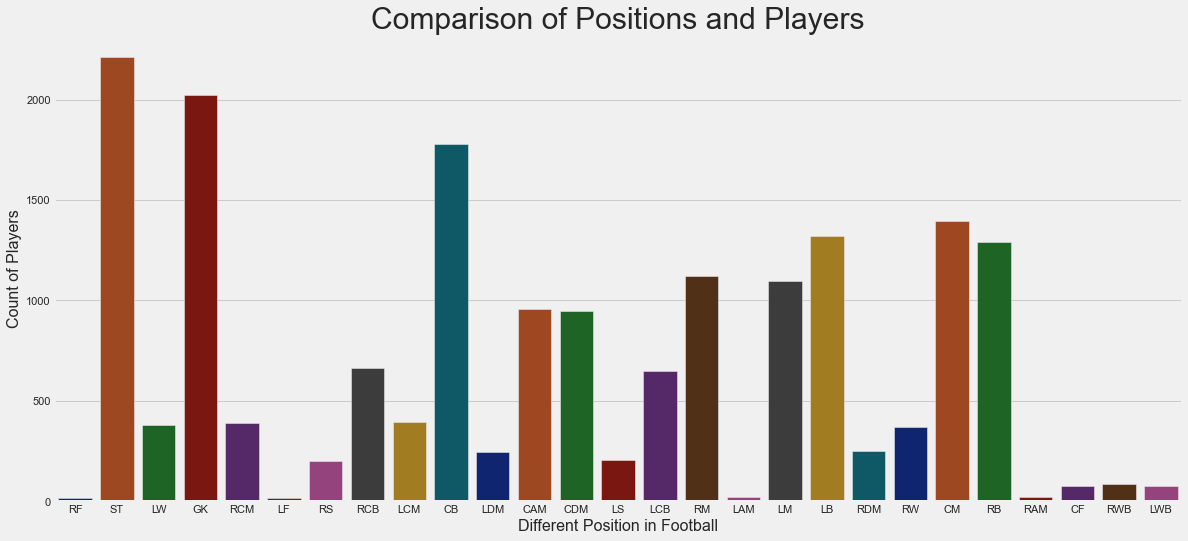

In [96]:
plt.figure(figsize=(18,8))
plt.style.use('fivethirtyeight')
ax= sns.countplot('Position', data=df, palette='dark')
ax.set_xlabel(xlabel="Different Position in Football", fontsize = 16)
ax.set_ylabel(ylabel="Count of Players", fontsize=16)
ax.set_title('Comparison of Positions and Players', fontsize=30)
plt.show()

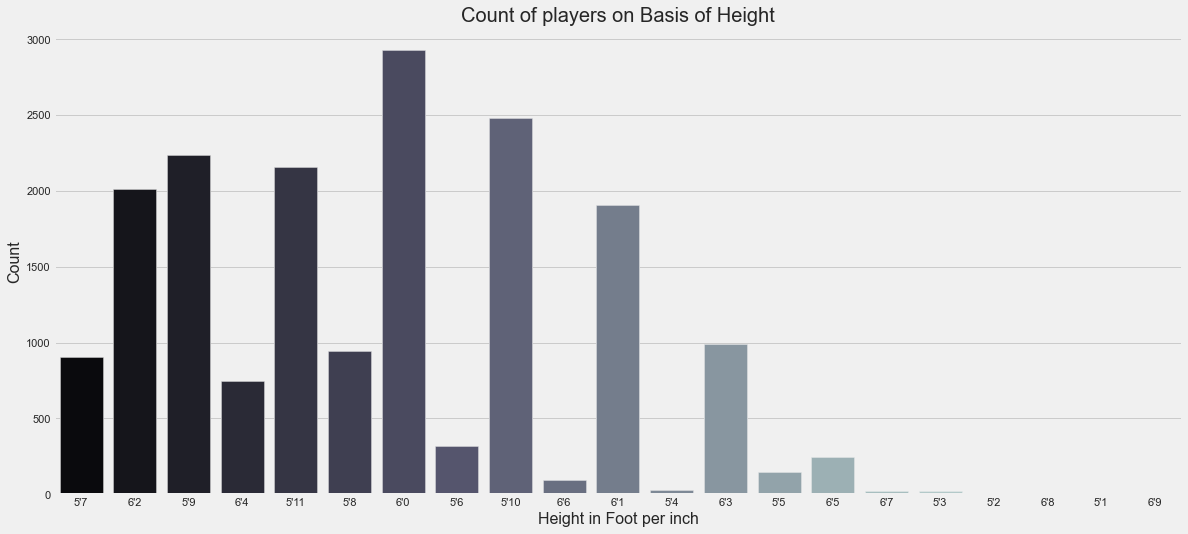

In [97]:
plt.figure(figsize=(18,8))
plt.style.use('fivethirtyeight')
ax= sns.countplot(x = 'Height', data=df, palette='bone')
ax= sns.countplot(x='Height', data=df, palette='bone')
ax.set_xlabel(xlabel='Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel='Count', fontsize = 16)
ax.set_title(label='Count of players on Basis of Height', fontsize = 20)
plt.show()

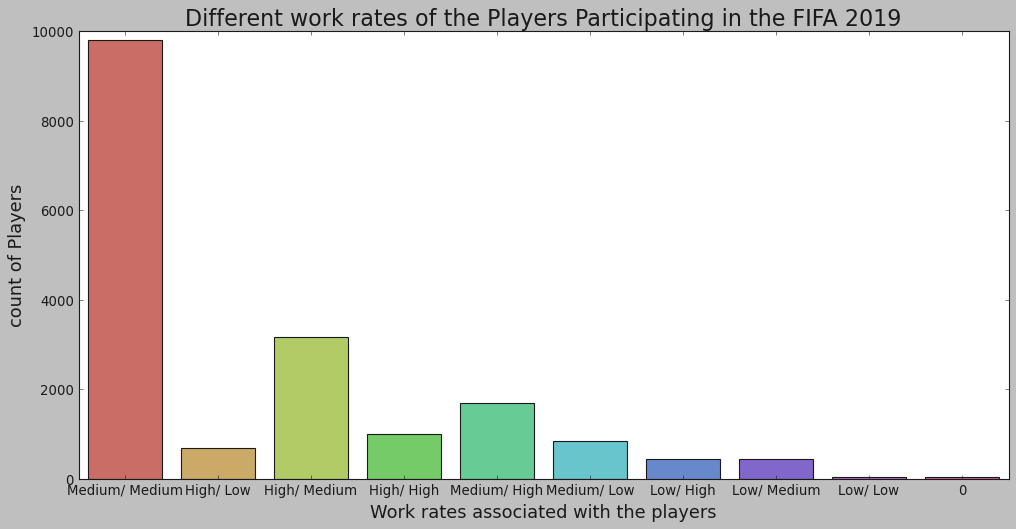

In [103]:
plt.figure(figsize=(15,7))
plt.style.use('_classic_test')
sns.countplot(x = 'Work Rate', data=df, palette='hls')
plt.title('Different work rates of the Players Participating in the FIFA 2019', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()


In [106]:
x = df.Special

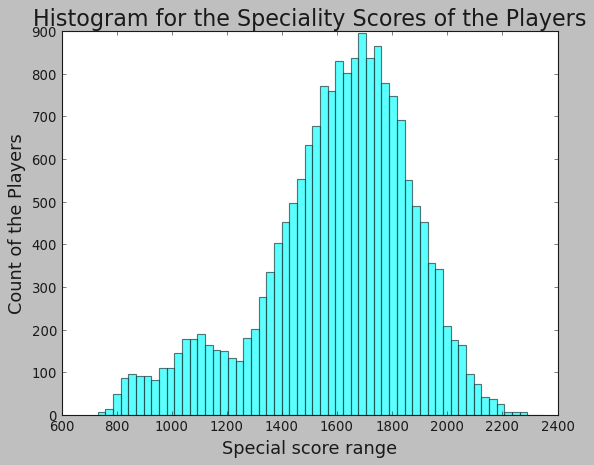

In [112]:
ax= sns.distplot(x, bins=58, kde=False, color='cyan')
ax= sns.distplot(x, bins=58, kde = False, color='cyan')
ax.set_xlabel(xlabel = 'Special score range', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of the Players',fontsize = 16)
ax.set_title(label = 'Histogram for the Speciality Scores of the Players', fontsize = 20)
plt.show()

In [113]:
some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')

In [122]:
data_countries = df.loc[df['Nationality'].isin(some_countries) & df['Overall']]

In [123]:
data_countries.head()

Unnamed: 0      ID          Name  Age  \
3            3  193080        De Gea   27   
8            8  155862  Sergio Ramos   32   
14          14  215914      N. Kanté   27   
15          15  211110     P. Dybala   24   
16          16  202126       H. Kane   24   

                                             Photo Nationality  \
3   https://cdn.sofifa.org/players/4/19/193080.png       Spain   
8   https://cdn.sofifa.org/players/4/19/155862.png       Spain   
14  https://cdn.sofifa.org/players/4/19/215914.png      France   
15  https://cdn.sofifa.org/players/4/19/211110.png   Argentina   
16  https://cdn.sofifa.org/players/4/19/202126.png     England   

                                   Flag  Overall  Potential  \
3   https://cdn.sofifa.org/flags/45.png       91         93   
8   https://cdn.sofifa.org/flags/45.png       91         91   
14  https://cdn.sofifa.org/flags/18.png       89         90   
15  https://cdn.sofifa.org/flags/52.png       89         94   
16  https://cdn.sofifa.org/flags/14.png       89         91   

                 Club  ... GKReflexes Release Clause Defending  General  \
3   Manchester United  ...       94.0        €138.6M        16       26   
8         Real Madrid  ...       11.0        €104.6M        90       78   
14            Chelsea  ...       10.0        €121.3M        89       66   
15           Juventus  ...        8.0        €153.5M        21       85   
16  Tottenham Hotspur  ...       11.0        €160.7M        43       82   

   Mental  Passing  Mobility  Power Rating Shooting  
3      43       39        66     54     92       21  
8      77       74        78     82     91       68  
14     83       78        84     85     90       61  
15     67       81        87     76     92       86  
16     75       79        76     80     90       85  

[5 rows x 97 columns]

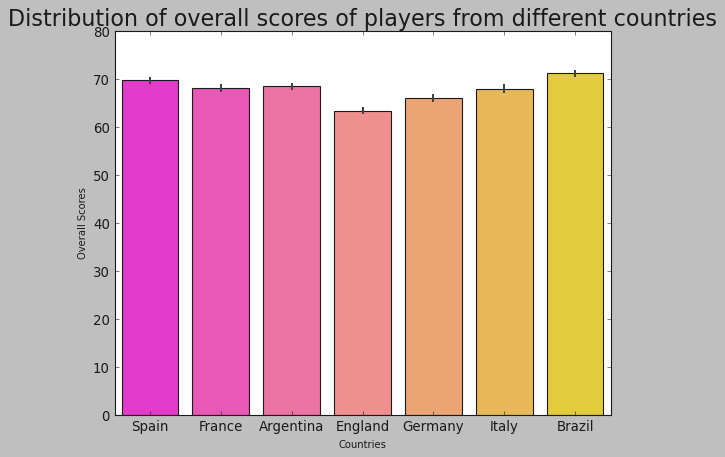

In [128]:
ax = sns.barplot(x = data_countries['Nationality'], y=data_countries['Overall'], palette='spring')
ax.set_xlabel(xlabel='Countries', fontsize = 9)
ax.set_ylabel(ylabel='Overall Scores', fontsize=9)
ax.set_title(label="Distribution of overall scores of players from different countries", fontsize=20)
plt.show()

In [132]:
df.Club.value_counts().head(10)

No Club               241
AS Monaco              33
Frosinone              33
CD Leganés             33
RC Celta               33
Valencia CF            33
Atlético Madrid        33
Borussia Dortmund      33
Real Madrid            33
Fortuna Düsseldorf     33
Name: Club, dtype: int64

In [133]:
data = df.copy()

In [135]:
plt.style.use('fivethirtyeight')
sns.set(style='ticks')

In [136]:
some_club = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

In [142]:
data_clubs = data.loc[data['Club'].isin(some_club) & data['Overall']]

In [143]:
data_clubs.head(10)

Unnamed: 0      ID             Name  Age  \
5            5  183277        E. Hazard   27   
6            6  177003        L. Modrić   32   
7            7  176580        L. Suárez   31   
8            8  155862     Sergio Ramos   32   
14          14  215914         N. Kanté   27   
16          16  202126          H. Kane   24   
18          18  192448    M. ter Stegen   26   
19          19  192119      T. Courtois   26   
20          20  189511  Sergio Busquets   29   
42          42  205600        S. Umtiti   24   

                                             Photo Nationality  \
5   https://cdn.sofifa.org/players/4/19/183277.png     Belgium   
6   https://cdn.sofifa.org/players/4/19/177003.png     Croatia   
7   https://cdn.sofifa.org/players/4/19/176580.png     Uruguay   
8   https://cdn.sofifa.org/players/4/19/155862.png       Spain   
14  https://cdn.sofifa.org/players/4/19/215914.png      France   
16  https://cdn.sofifa.org/players/4/19/202126.png     England   
18  https://cdn.sofifa.org/players/4/19/192448.png     Germany   
19  https://cdn.sofifa.org/players/4/19/192119.png     Belgium   
20  https://cdn.sofifa.org/players/4/19/189511.png       Spain   
42  https://cdn.sofifa.org/players/4/19/205600.png      France   

                                   Flag  Overall  Potential  \
5    https://cdn.sofifa.org/flags/7.png       91         91   
6   https://cdn.sofifa.org/flags/10.png       91         91   
7   https://cdn.sofifa.org/flags/60.png       91         91   
8   https://cdn.sofifa.org/flags/45.png       91         91   
14  https://cdn.sofifa.org/flags/18.png       89         90   
16  https://cdn.sofifa.org/flags/14.png       89         91   
18  https://cdn.sofifa.org/flags/21.png       89         92   
19   https://cdn.sofifa.org/flags/7.png       89         90   
20  https://cdn.sofifa.org/flags/45.png       89         89   
42  https://cdn.sofifa.org/flags/18.png       87         92   

                 Club  ... GKReflexes Release Clause Defending  General  \
5             Chelsea  ...        8.0        €172.1M        28       83   
6         Real Madrid  ...        9.0        €137.4M        70       81   
7        FC Barcelona  ...       37.0          €164M        48       85   
8         Real Madrid  ...       11.0        €104.6M        90       78   
14            Chelsea  ...       10.0        €121.3M        89       66   
16  Tottenham Hotspur  ...       11.0        €160.7M        43       82   
18       FC Barcelona  ...       90.0        €123.3M        16       16   
19        Real Madrid  ...       88.0        €113.7M        18       17   
20       FC Barcelona  ...       13.0        €105.6M        85       76   
42       FC Barcelona  ...       15.0        €121.1M        88       74   

   Mental  Passing  Mobility  Power Rating Shooting  
5      72       84        92     75     91       82  
6      80       89        84     77     91       78  
7      78       74        84     81     91       87  
8      77       74        78     82     91       68  
14     83       78        84     85     90       61  
16     75       79        76     80     90       85  
18     43       31        52     59     90       16  
19     32       27        61     55     90       21  
20     85       78        64     70     89       59  
42     73       74        74     79     90       67  

[10 rows x 97 columns]

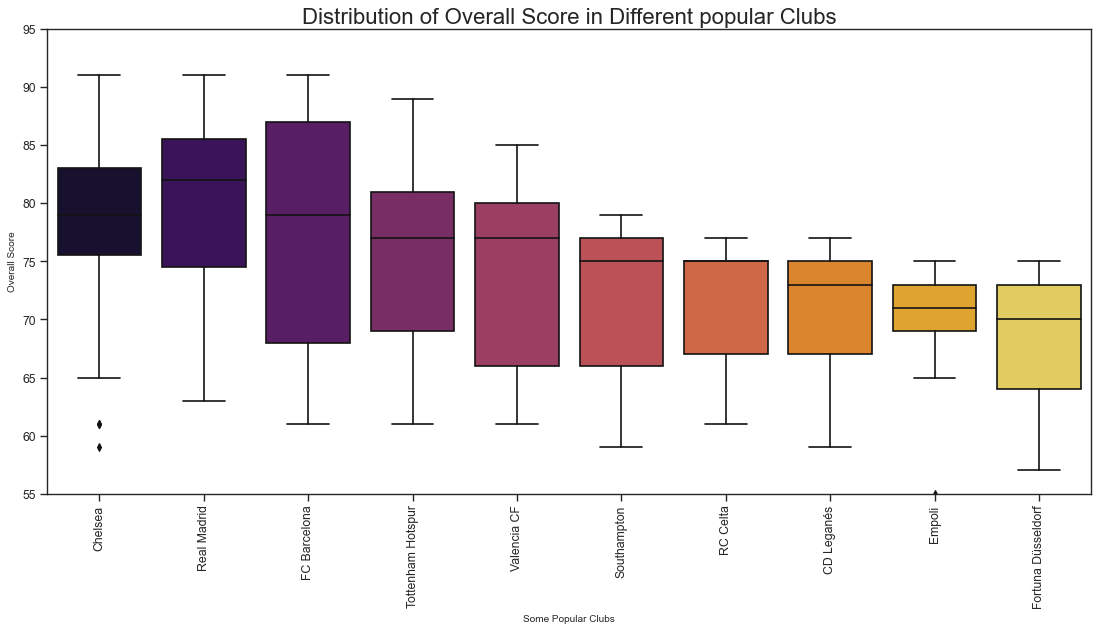

In [150]:
plt.rcParams['figure.figsize'] = (15,7)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette='inferno')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [159]:
left = data[data['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club', 'Nationality']].head(10)

In [160]:
right = data[data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club', 'Nationality']].head(10)

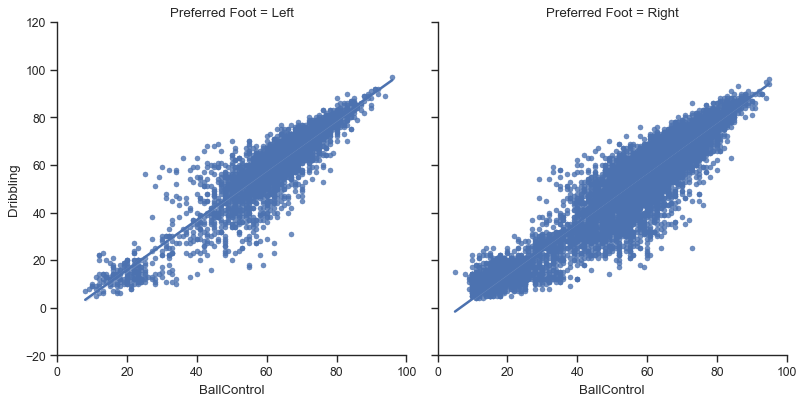

In [165]:
sns.lmplot(x = 'BallControl', y = 'Dribbling', data=data, col='Preferred Foot')
plt.show()

In [173]:
data.groupby(data['Club'])['Nationality'].nunique().sort_values(ascending = False).head(10)

Club
No Club                   28
Brighton & Hove Albion    21
Fulham                    19
Udinese                   18
West Ham United           18
Empoli                    18
AS Monaco                 18
Eintracht Frankfurt       18
Lazio                     18
Napoli                    18
Name: Nationality, dtype: int64

In [178]:
data.groupby(data['Club'])['Nationality'].nunique().sort_values().head(10)

Club
Santos                       1
Ceará Sporting Club          1
América FC (Minas Gerais)    1
Paraná                       1
Chapecoense                  1
Padova                       1
Cittadella                   1
Sangju Sangmu FC             1
Ranheim Fotball              1
CA Osasuna                   1
Name: Nationality, dtype: int64

In [182]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [183]:
df.head()

ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     Club_Logo  ...  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png  ...   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  ...   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png  ...   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png  ...   

  GKReflexes Release Clause  Defending General  Mental  Passing  Mobility  \
0        8.0        €226.5M         29      89      71       87        91   
1       11.0        €127.1M         27      88      73       81        91   
2       11.0        €228.1M         28      85      72       80        94   
3       94.0        €138.6M         16      26      43       39        66   
4       13.0        €196.4M         59      79      81       92        81   

  Power Rating Shooting  
0    74     94       88  
1    83     94       88  
2    69     92       84  
3    54     92       21  
4    76     92       85  

[5 rows x 96 columns]

In [190]:
player = str(df.loc[df['Potential'].idxmax()][1])

In [193]:
print('Maximum Potential: : '+str(df.loc[df['Potential'].idxmax()][1]))
print('Maximum Overall Performance: : '+str(df.loc[df['Overall'].idxmax()][1]))

Maximum Potential: : K. Mbappé
Maximum Overall Performance: : L. Messi


In [194]:
pr_cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

In [196]:
i = 0

while i<len(pr_cols):
    print("Best {0} : {1}".format(pr_cols[i], df.loc[df[pr_cols[i]].idxmax()][1]))
    i+=1

Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modrić
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Best GKReflexes : De Gea


In [205]:
i = 0
while i <len(pr_cols):
    print("Best {0}: {1}".format(pr_cols[i], df.loc[df[pr_cols[i]].idxmax()][1]))
    i+=1
    

Best Crossing: K. De Bruyne
Best Finishing: L. Messi
Best HeadingAccuracy: Naldo
Best ShortPassing: L. Modrić
Best Volleys: E. Cavani
Best Dribbling: L. Messi
Best Curve: Quaresma
Best FKAccuracy: L. Messi
Best LongPassing: T. Kroos
Best BallControl: L. Messi
Best Acceleration: Douglas Costa
Best SprintSpeed: K. Mbappé
Best Agility: Neymar Jr
Best Reactions: Cristiano Ronaldo
Best Balance: Bernard
Best ShotPower: Cristiano Ronaldo
Best Jumping: Cristiano Ronaldo
Best Stamina: N. Kanté
Best Strength: A. Akinfenwa
Best LongShots: L. Messi
Best Aggression: B. Pearson
Best Interceptions: N. Kanté
Best Positioning: Cristiano Ronaldo
Best Vision: L. Messi
Best Penalties: M. Balotelli
Best Composure: L. Messi
Best Marking: A. Barzagli
Best StandingTackle: G. Chiellini
Best SlidingTackle: Sergio Ramos
Best GKDiving: De Gea
Best GKHandling: J. Oblak
Best GKKicking: M. Neuer
Best GKPositioning: G. Buffon
Best GKReflexes: De Gea


In [208]:
i = 0

best = []
while i < len(pr_cols):
    best.append(df.loc[df[pr_cols[i]].idxmax()][1])
    i+=1

In [209]:
best


['K. De Bruyne',
 'L. Messi',
 'Naldo',
 'L. Modrić',
 'E. Cavani',
 'L. Messi',
 'Quaresma',
 'L. Messi',
 'T. Kroos',
 'L. Messi',
 'Douglas Costa',
 'K. Mbappé',
 'Neymar Jr',
 'Cristiano Ronaldo',
 'Bernard',
 'Cristiano Ronaldo',
 'Cristiano Ronaldo',
 'N. Kanté',
 'A. Akinfenwa',
 'L. Messi',
 'B. Pearson',
 'N. Kanté',
 'Cristiano Ronaldo',
 'L. Messi',
 'M. Balotelli',
 'L. Messi',
 'A. Barzagli',
 'G. Chiellini',
 'Sergio Ramos',
 'De Gea',
 'J. Oblak',
 'M. Neuer',
 'G. Buffon',
 'De Gea']

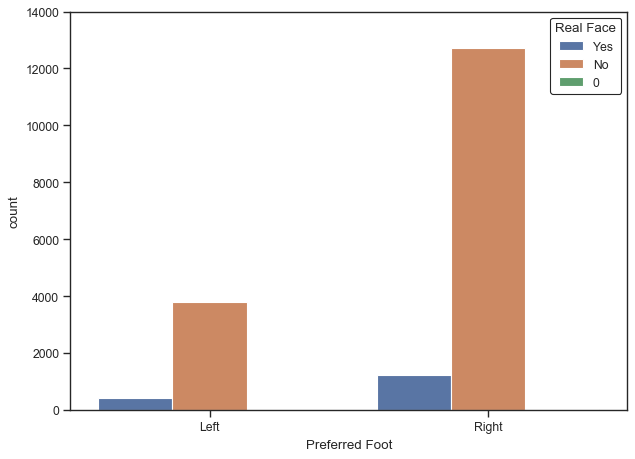

In [214]:
f, ax = plt.subplots(figsize = (8,6))
sns.countplot(x = 'Preferred Foot', data=df, hue='Real Face')
plt.show()

In [218]:
df.loc[df['Potential'].idxmax()][1]

'K. Mbappé'

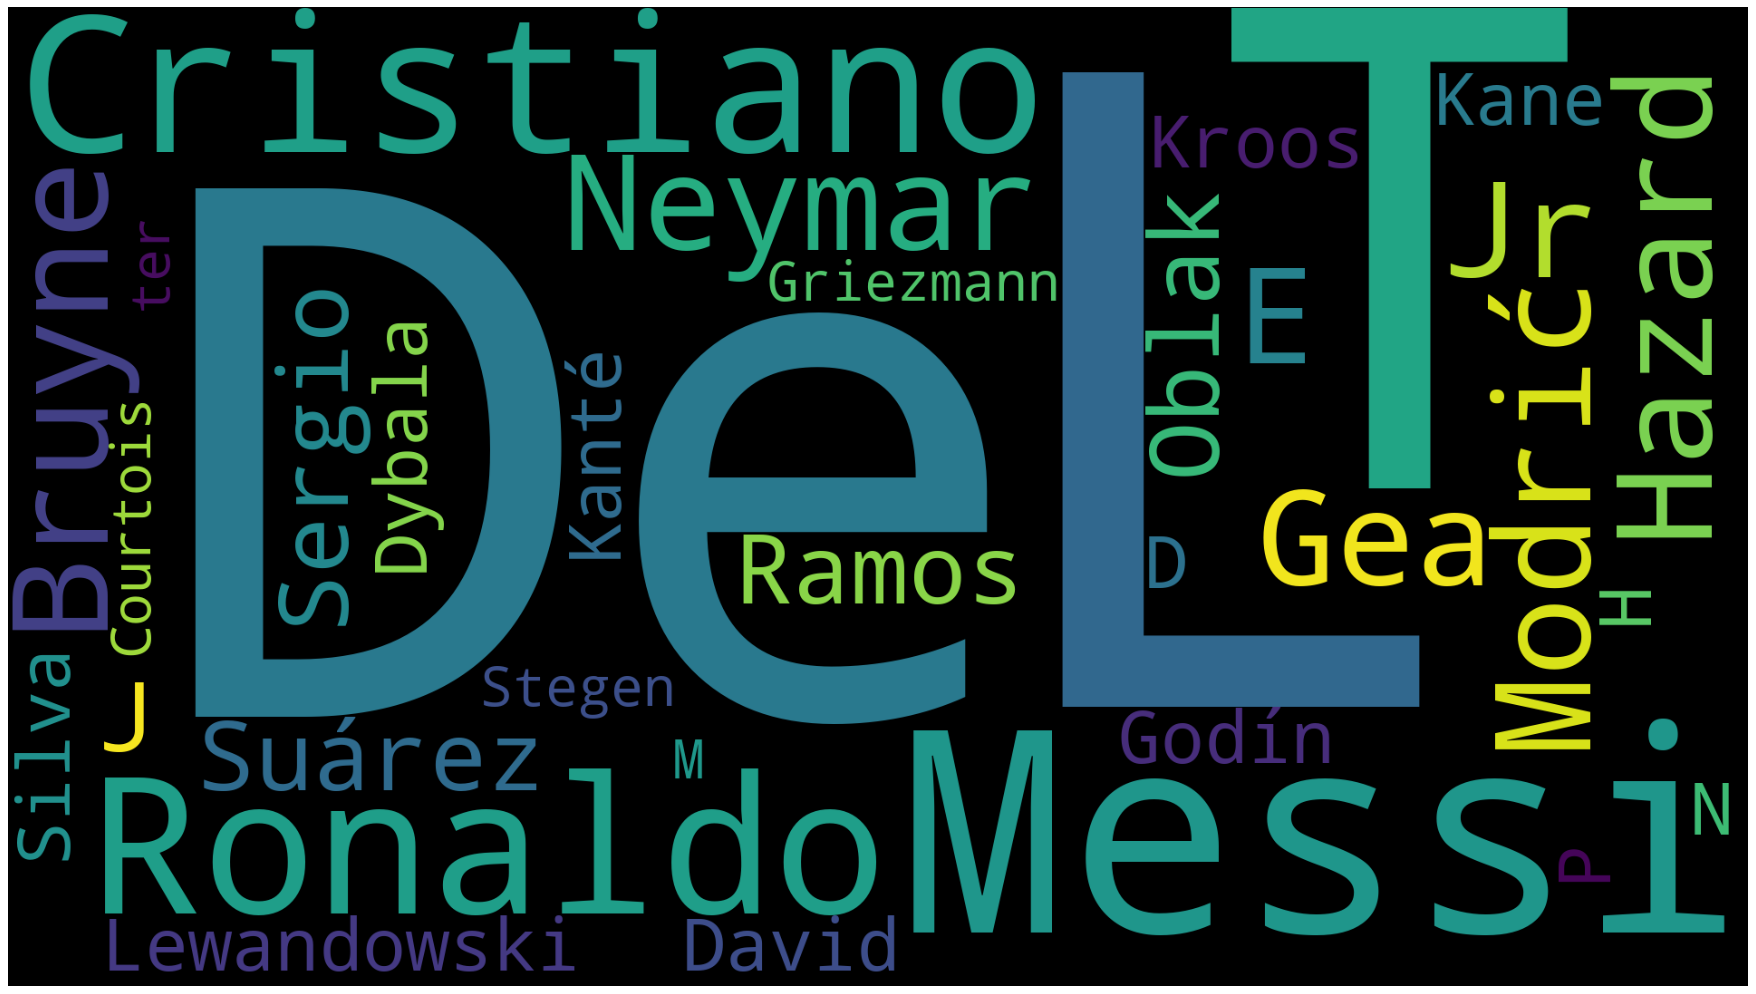

In [226]:
plt.figure(figsize=(25,15))
wordcloud = WordCloud(background_color='black',
         width=1920,
         height=1080).generate(" ".join(df.Name[:20]))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('players.png')
plt.show()

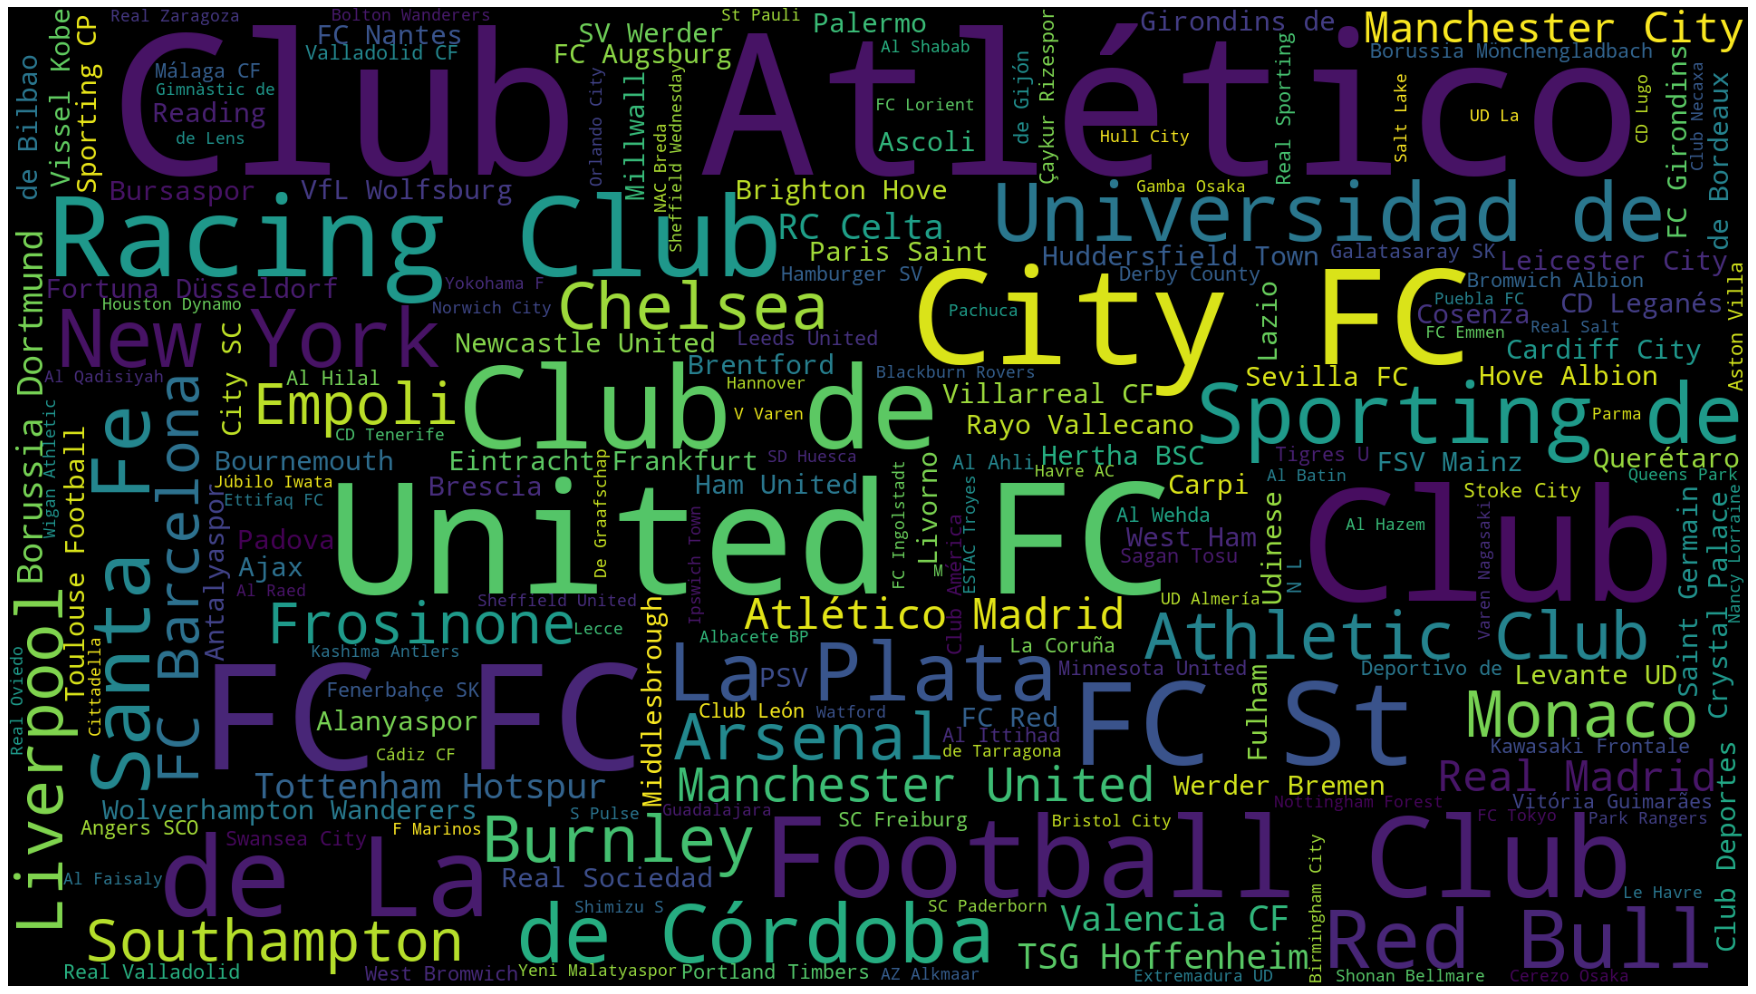

In [227]:
plt.figure(figsize=(25,15))
wordcloud = WordCloud(background_color='black',
         width=1920,
         height=1080).generate(" ".join(df.Club))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('players1.png')
plt.show()

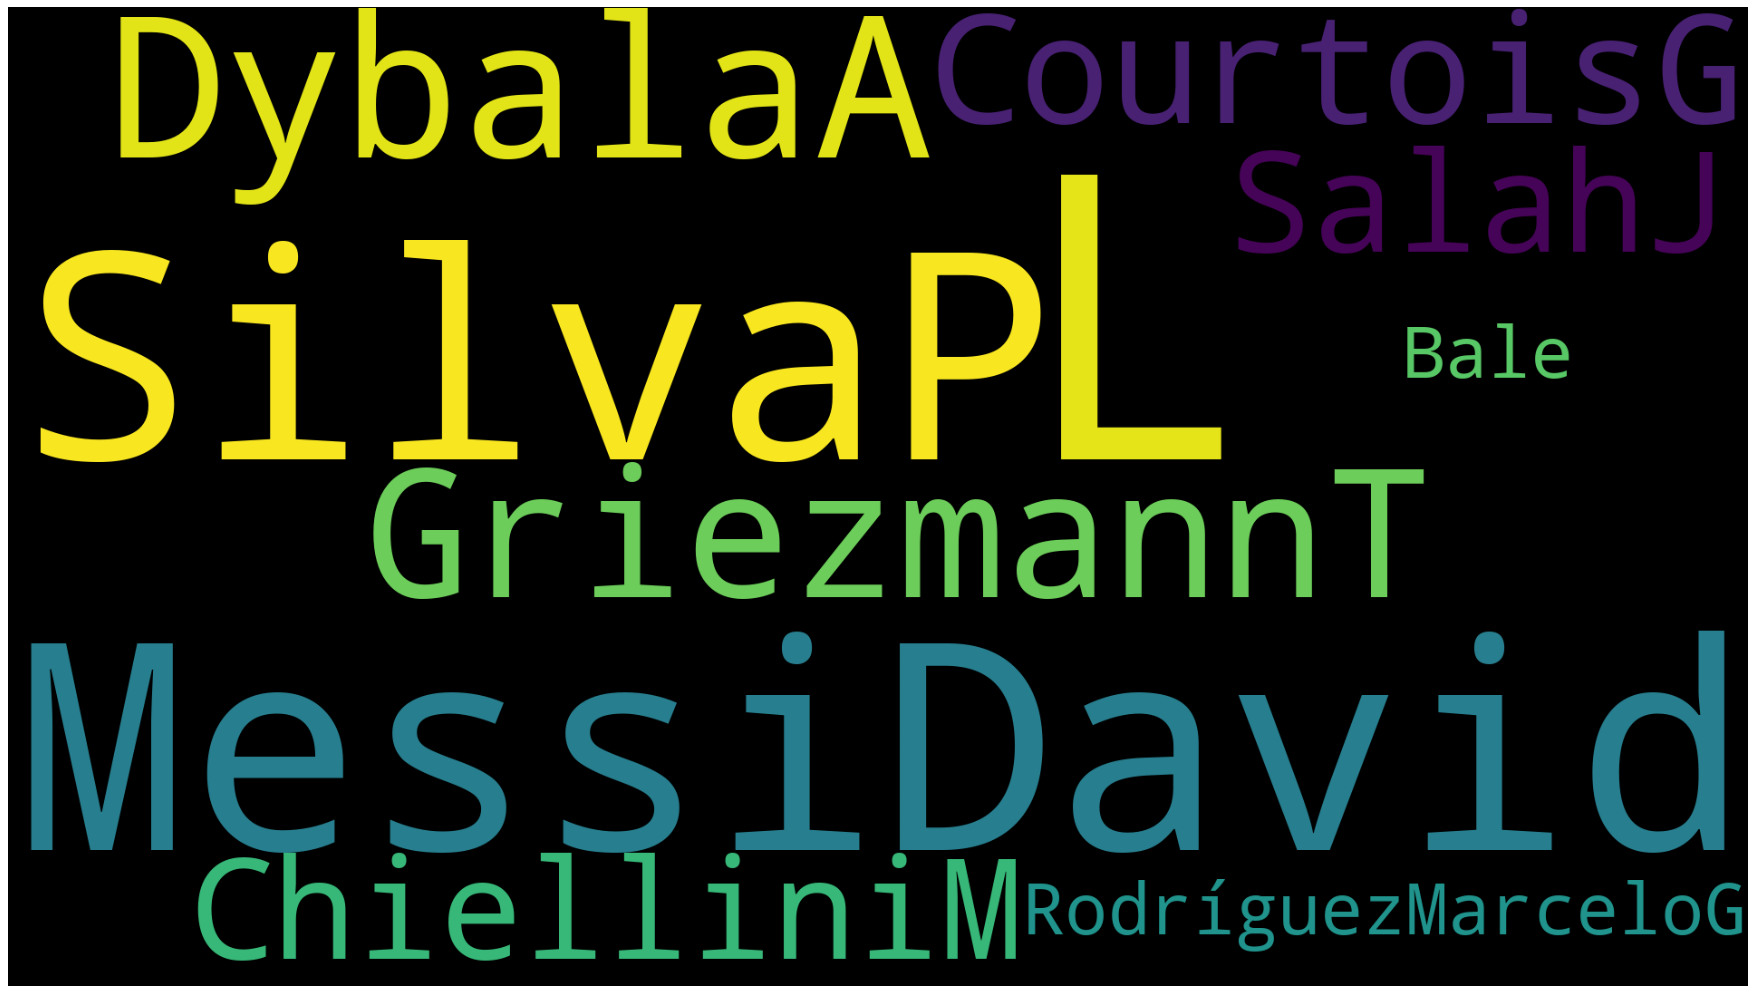

In [231]:
plt.subplots(figsize = (25,18))
wordcloud = WordCloud(background_color='black',
         width=1920,
         height=1080).generate("".join(left.Name))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('players2.png')
plt.show()

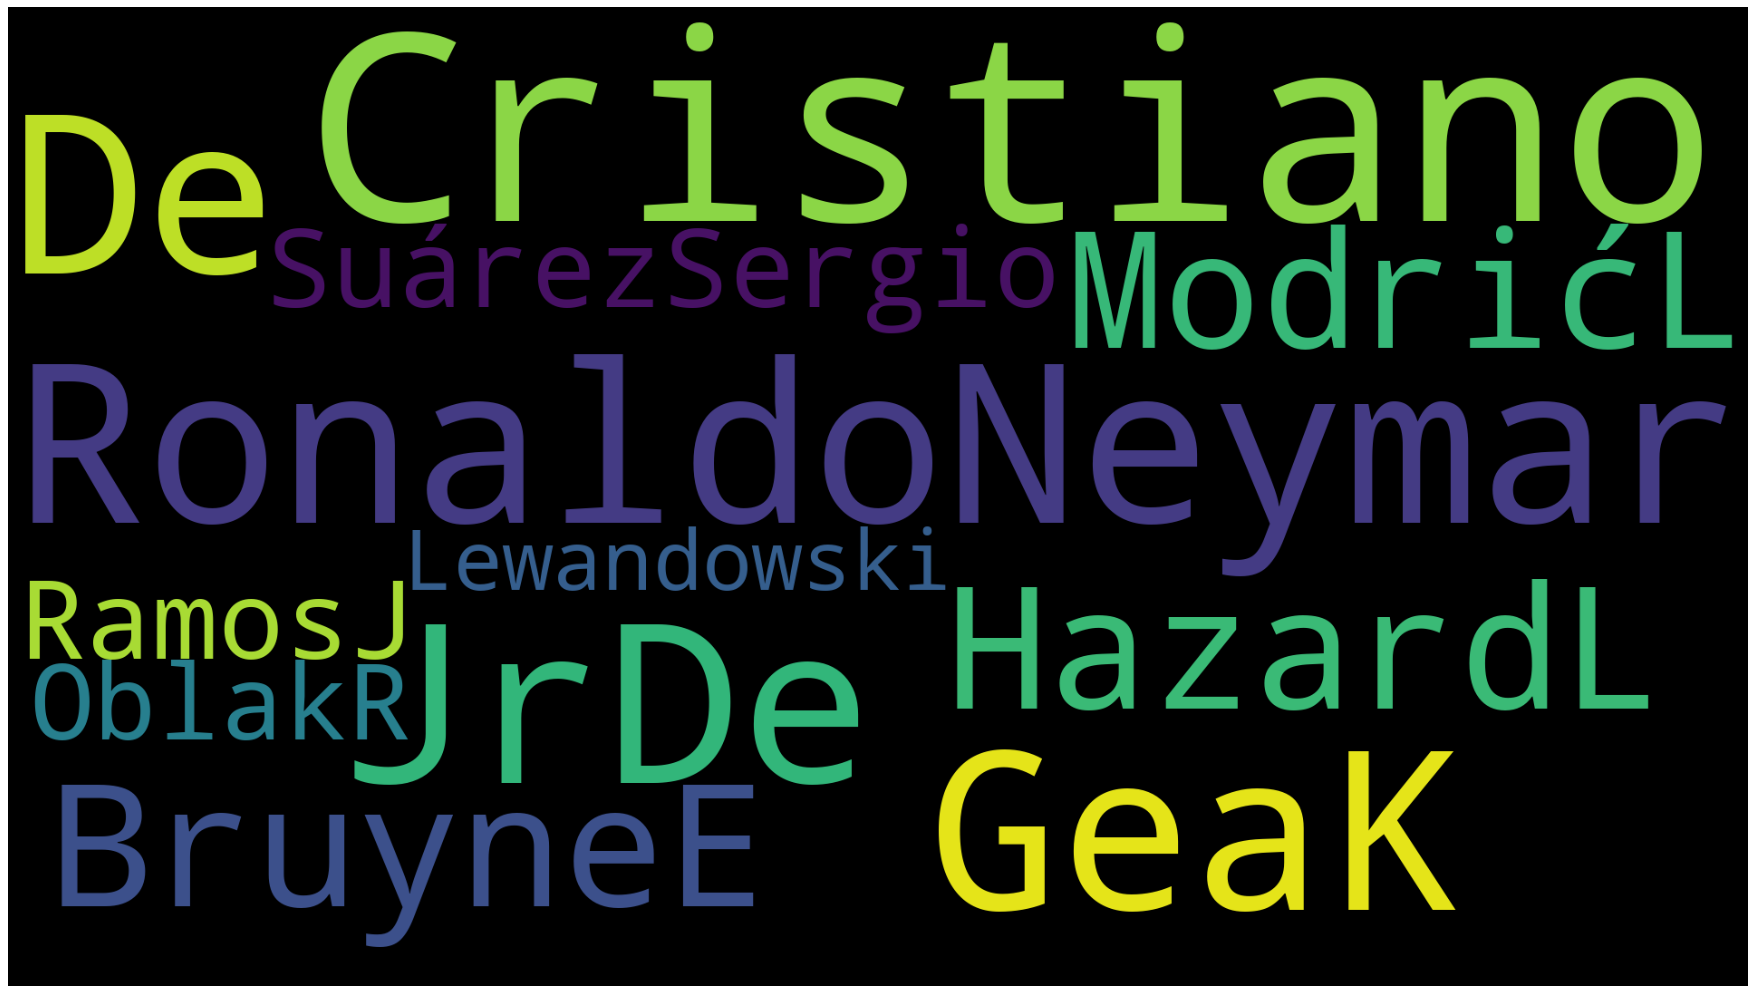

In [232]:
plt.subplots(figsize = (25,18))
wordcloud = WordCloud(background_color='black',
         width=1920,
         height=1080).generate("".join(right.Name))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('players4.png')
plt.show()

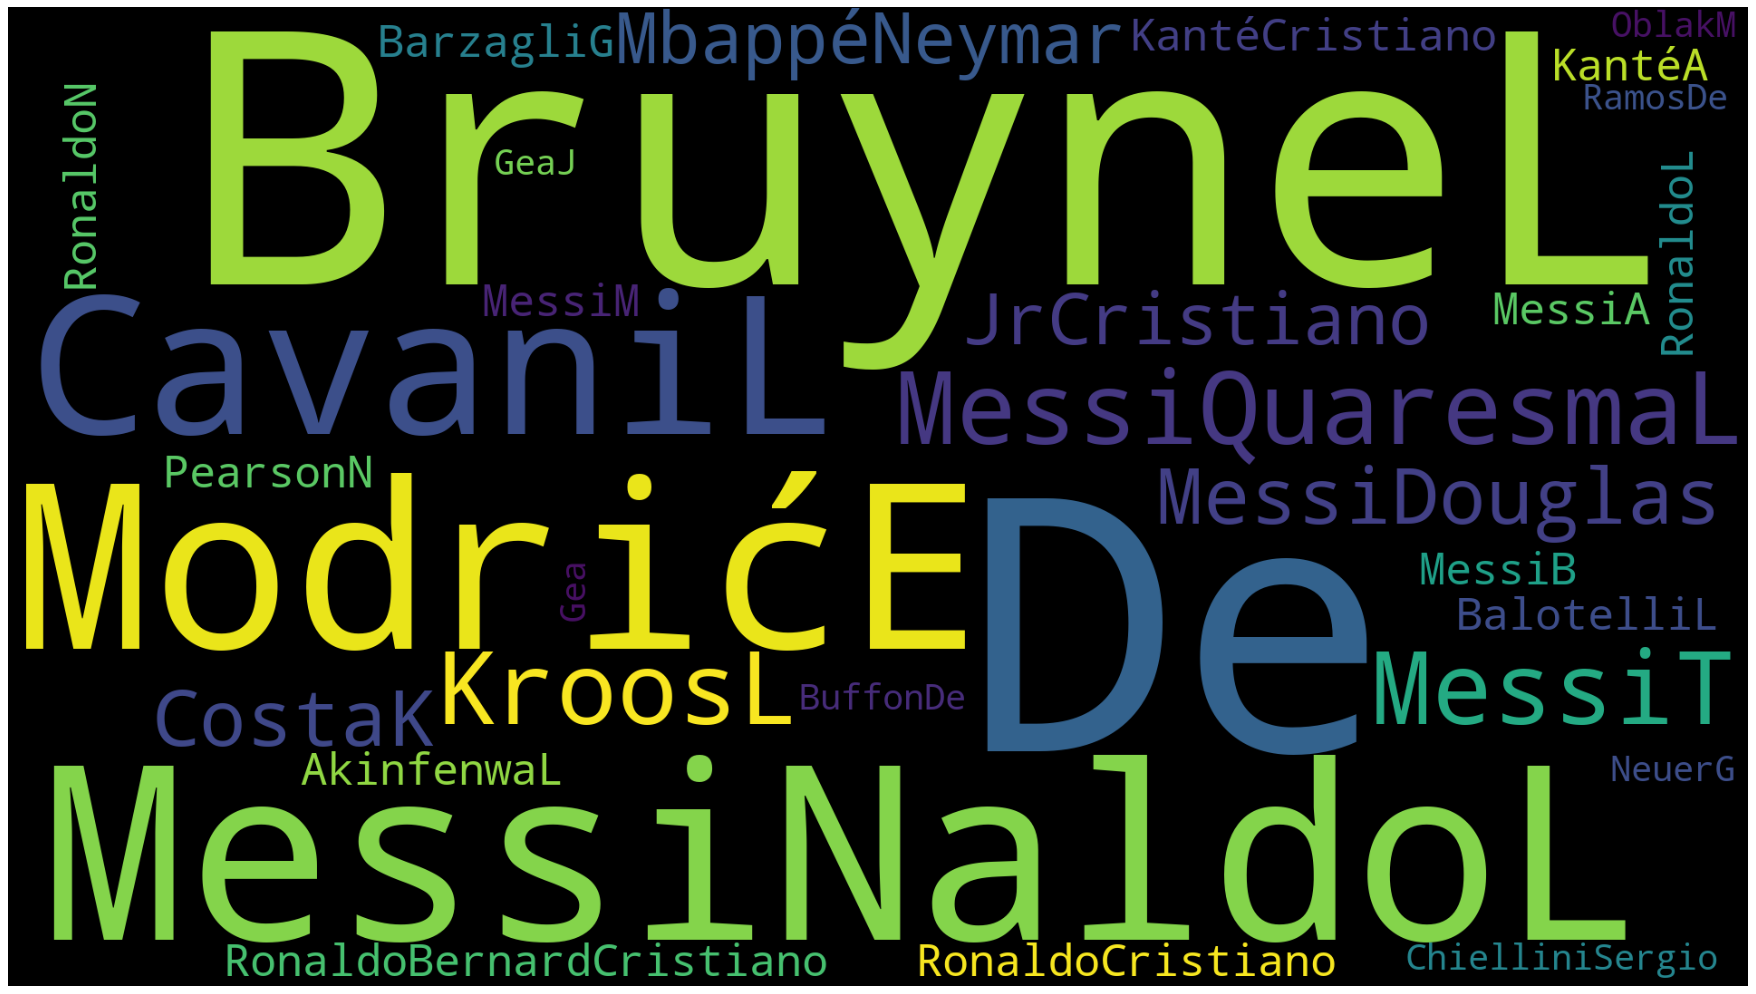

In [233]:
plt.subplots(figsize = (25,18))
wordcloud = WordCloud(background_color='black',
         width=1920,
         height=1080).generate("".join(best))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('players5.png')
plt.show()

In [234]:
import requests
import random
from math import pi

import matplotlib.image as mpimg
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)

# defining a method to show the details of a player
def details(row, title, image, age, nationality, photo, logo, club):
    
    flag_image = "img_flag.jpg"
    player_image = "img_player.jpg"
    logo_image = "img_club_logo.jpg"
     
    # obtaining the player image, flag image and logo image
    img_flag = requests.get(image).content
    with open(flag_image, 'wb') as handler:
        handler.write(img_flag)
    
    player_img = requests.get(photo).content
    with open(player_image, 'wb') as handler:
        handler.write(player_img)
     
    logo_img = requests.get(logo).content
    with open(logo_image, 'wb') as handler:
        handler.write(logo_img)
     
    # Defining the colour schemes
    r = lambda: random.randint(0,255)
    colorRandom = '#%02X%02X%02X' % (r(),r(),r())
    
    if colorRandom == '#ffffff':colorRandom = '#a5d6a7' # if random colour  is white, assign a different colour
    
    basic_color = '#37474f'
    color_annotate = '#01579b'
    
    img = mpimg.imread(flag_image)
    
    plt.figure(figsize=(15,8))
    categories=list(players)[1:]
    coulumnDontUseGraph = ['Flag', 'Age', 'Nationality', 'Photo', 'Logo', 'Club']
    N = len(categories) - len(coulumnDontUseGraph)
    
    # adjusting the angles to show different aspects in the graph
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(111, projection='polar') # sepcifying a  polar graph type
    ax.set_theta_offset(pi / 2) # set the offset in radians
    ax.set_theta_direction(-1) #the angle increases in the clockwise direction
    plt.xticks(angles[:-1], categories, color= 'black', size=17)
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75,100], ["25","50","75","100"], color= basic_color, size= 10)
    plt.ylim(0,100)
    
    #creating the list of values which are not in (image, age, nationality, photo, logo, club) to show in the graph
    values = players.loc[row].drop('Name').values.flatten().tolist() 
    valuesDontUseGraph = [image, age, nationality, photo, logo, club]
    values = [e for e in values if e not in (valuesDontUseGraph)]
    values += values[:1]
    
    # customizing the graph attributes
    ax.plot(angles, values, color= basic_color, linewidth=1, linestyle='solid')
    ax.fill(angles, values, color= colorRandom, alpha=0.5)
    axes_coords = [0, 0, 1, 1]
    ax_image = plt.gcf().add_axes(axes_coords,zorder= -1)
    ax_image.imshow(img,alpha=0.5)
    ax_image.axis('off')
    
    # placeholders for showing nationality, age and team name
    ax.annotate('Nationality: ' + nationality.upper(), xy=(10,10), xytext=(103, 138),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
                      
    ax.annotate('Age: ' + str(age), xy=(10,10), xytext=(43, 180),
                fontsize= 15,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
    
    ax.annotate('Team: ' + club.upper(), xy=(10,10), xytext=(92, 168),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})

    # specifying the location for showing the image of player
    arr_img_player = plt.imread(player_image, format='jpg')
    imagebox_player = OffsetImage(arr_img_player)
    imagebox_player.image.axes = ax
    abPlayer = AnnotationBbox(imagebox_player, (0.5, 0.7),
                        xybox=(313, 223),
                        xycoords='data',
                        boxcoords="offset points"
                        )
    # specifying the location for showing the logo
    arr_img_logo = plt.imread(logo_image, format='jpg')
    
    imagebox_logo = OffsetImage(arr_img_logo)
    imagebox_logo.image.axes = ax
    abLogo = AnnotationBbox(imagebox_logo, (0.5, 0.7),
                        xybox=(-350, -246),
                        xycoords='data',
                        boxcoords="offset points"
                        )

    ax.add_artist(abPlayer)
    ax.add_artist(abLogo)

    plt.title(title, size=50, color= basic_color)

In [235]:
def graphPolar(id = 0):
    if 0 <= id < len(data.ID):
        details(row = players.index[id], 
                title = players['Name'][id], 
                age = players['Age'][id], 
                photo = players['Photo'][id],
                nationality = players['Nationality'][id],
                image = players['Flag'][id], 
                logo = players['Club_Logo'][id], 
                club = players['Club'][id])
    else:
         print('The base has 17917 players. You can put positive numbers from 0 to 17917')
        